# <center> Credit card Customer Clustering </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("CC_GENERAL.csv")

In [3]:
print(f"Number of rows: {len(data)}")
print(f"Columns: {[column for column in data.columns]}")

Number of rows: 8950
Columns: ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [4]:
data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


| feature name | feature type | comments |
| --- | --- | --- |
| CUST_ID | text | Identification of Credit Card holder (Categorical) |
| BALANCE | numerical | Balance amount left in their account to make purchases |
| BALANCE_FREQUENCY | numerical | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
| PURCHASES | numerical | Amount of purchases made from account |
| ONEOFF_PURCHASES | numerical | Maximum purchase amount done in one-go |
| INSTALLMENTS_PURCHASES | numerical | Amount of purchase done in installment |
| CASH_ADVANCE | categorical | Cash in advance given by the user |
| PURCHASES_FREQUENCY | numerical  | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFFPURCHASESFREQUENCY | numerical | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
| PURCHASESINSTALLMENTSFREQUENCY | text | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
| CASHADVANCEFREQUENCY | numerical  | How frequently the cash in advance being paid |
| CASHADVANCETRX | numerical  | Number of Transactions made with "Cash in Advanced" |
| PURCHASES_TRX | numerical  | Numbe of purchase transactions made |
| CREDIT_LIMIT | numerical  | Limit of Credit Card for user |
| PAYMENTS | numerical  | Amount of Payment done by user |
| MINIMUM_PAYMENTS | numerical  | Minimum amount of payments made by user |
| PRCFULLPAYMENT | numerical  | Percent of full payment paid by user |
| TENURE | numerical  | Tenure of credit card service for user |




# IDE (Initial Dataset Exploration)

In [7]:
data = data.drop("CUST_ID", axis=1)

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


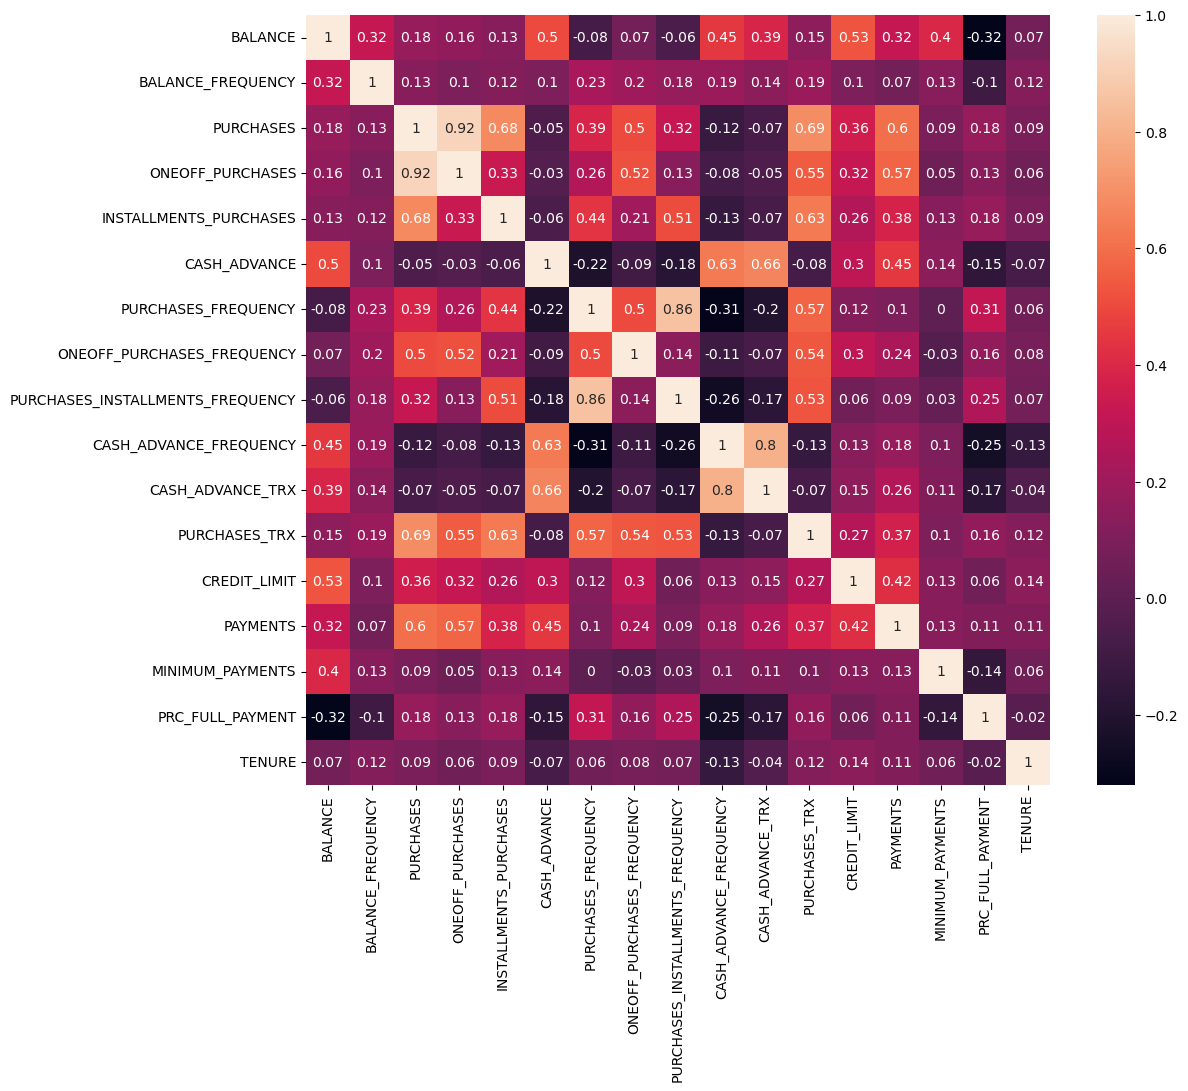

In [9]:
corrmat = data.corr().round(2)
f, ax = plt.subplots(figsize=(12,10)  )
sns.heatmap(corrmat, annot=True)
plt.show()

In [10]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)'] = (data.shape[0] - missing_df['missing values']) / data.shape[0] * 100

# Calculate percentage of zeros in each column
zero_df = (data == 0).sum(axis=0).reset_index()
zero_df.columns = ['variable', 'zero values']
zero_df['percentage of zeros (%)'] = (zero_df['zero values']) / data.shape[0] * 100

# Merge the missing values and zero values dataframes
merged_df = pd.merge(missing_df, zero_df, on='variable')
merged_df = merged_df[['variable', 'missing values', 'filling factor (%)', 'zero values', 'percentage of zeros (%)']]
merged_df.sort_values('percentage of zeros (%)',ascending=False).reset_index(drop=True)


,variable,missing values,filling factor (%),zero values,percentage of zeros (%)
0,PRC_FULL_PAYMENT,0,100.000000,5903,65.955307
1,CASH_ADVANCE,0,100.000000,4628,51.709497
2,CASH_ADVANCE_FREQUENCY,0,100.000000,4628,51.709497
3,CASH_ADVANCE_TRX,0,100.000000,4628,51.709497
4,ONEOFF_PURCHASES,0,100.000000,4302,48.067039
5,ONEOFF_PURCHASES_FREQUENCY,0,100.000000,4302,48.067039
6,INSTALLMENTS_PURCHASES,0,100.000000,3916,43.754190
7,PURCHASES_INSTALLMENTS_FREQUENCY,0,100.000000,3915,43.743017
8,PURCHASES,0,100.000000,2044,22.837989
9,PURCHASES_TRX,0,100.000000,2044,22.837989


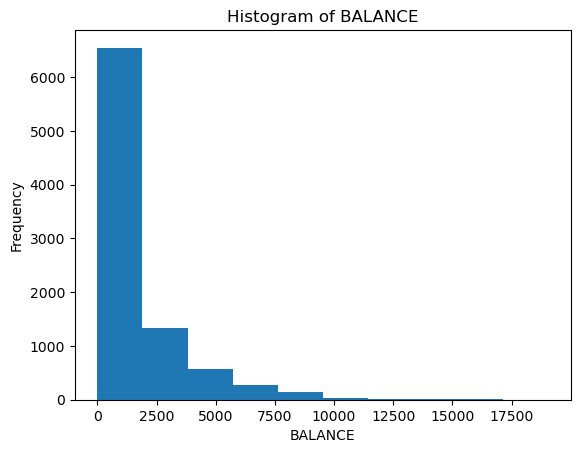

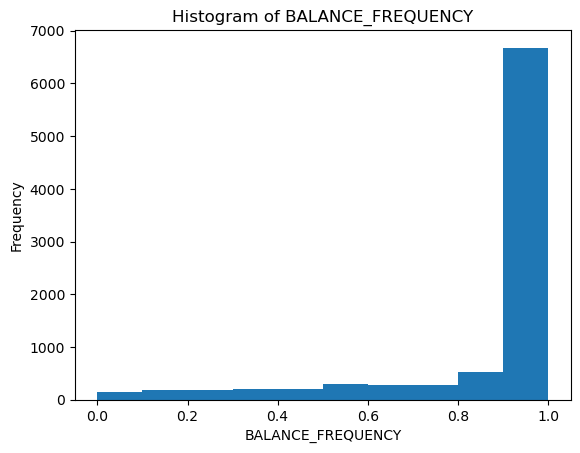

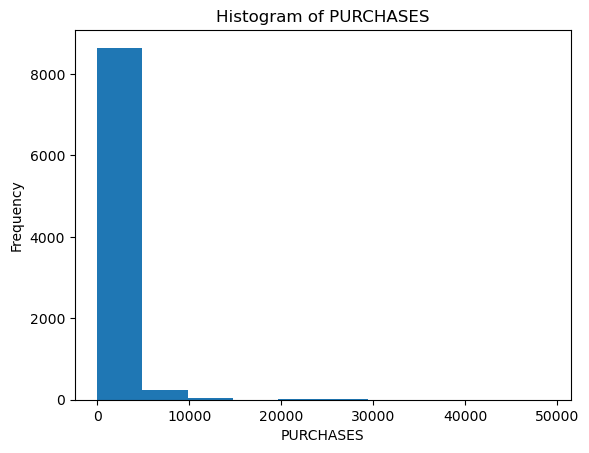

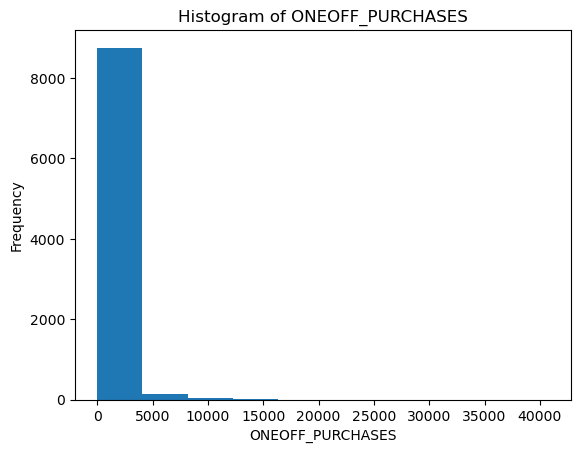

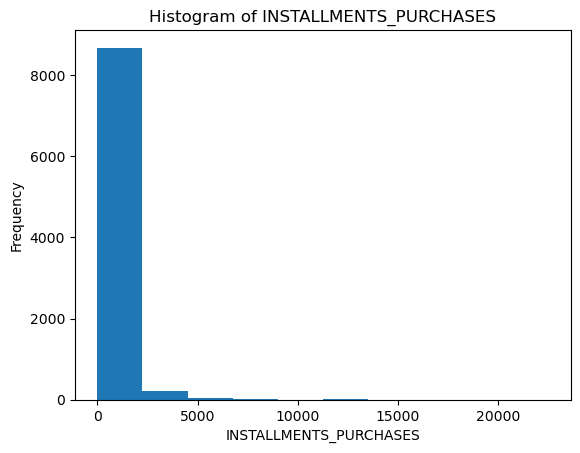

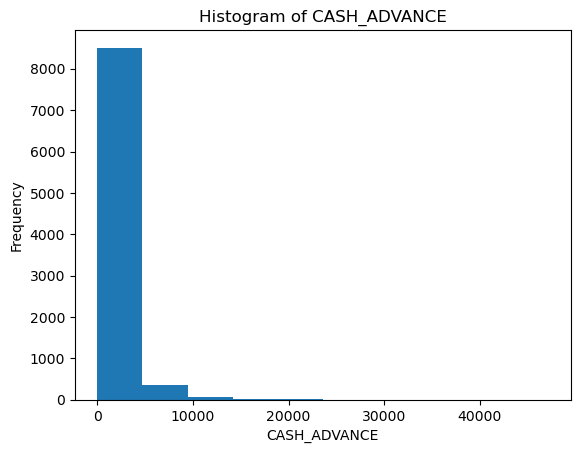

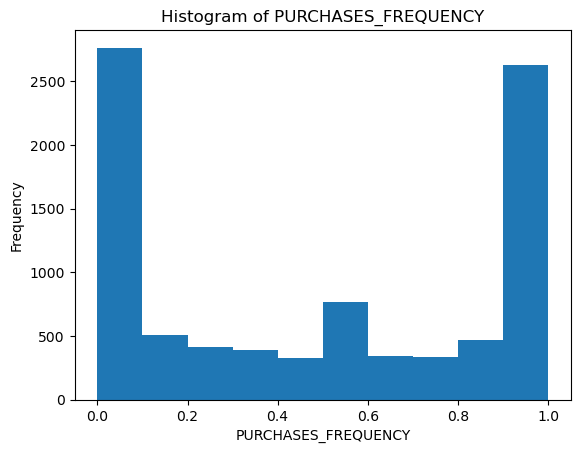

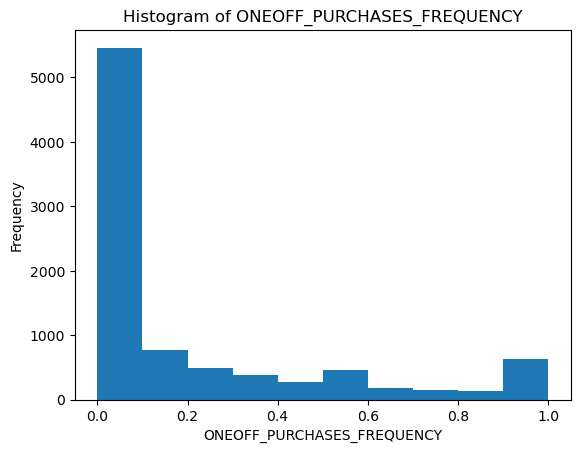

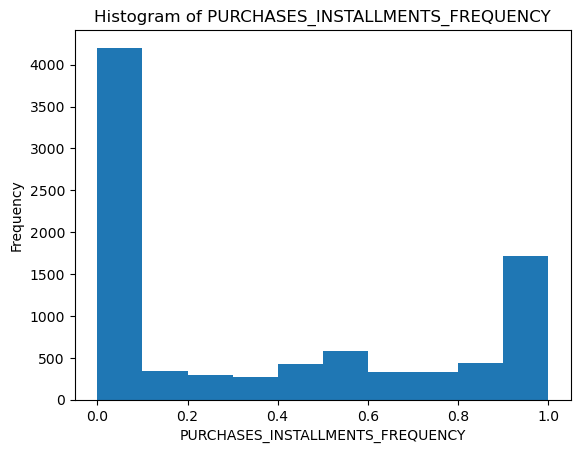

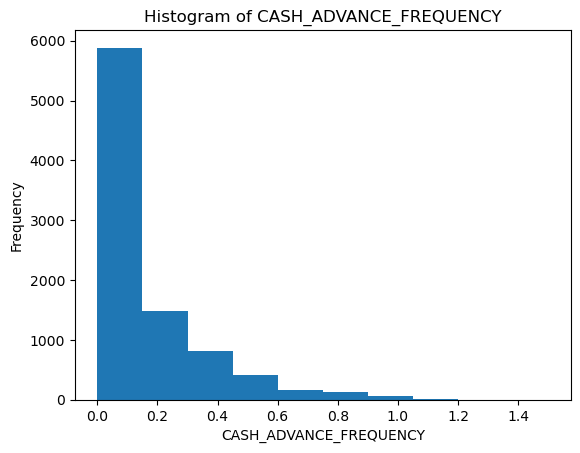

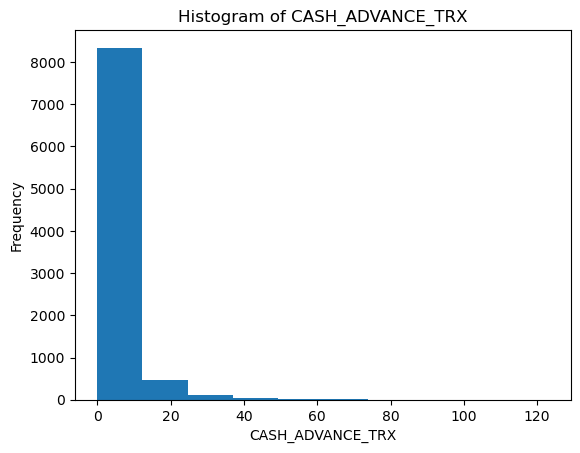

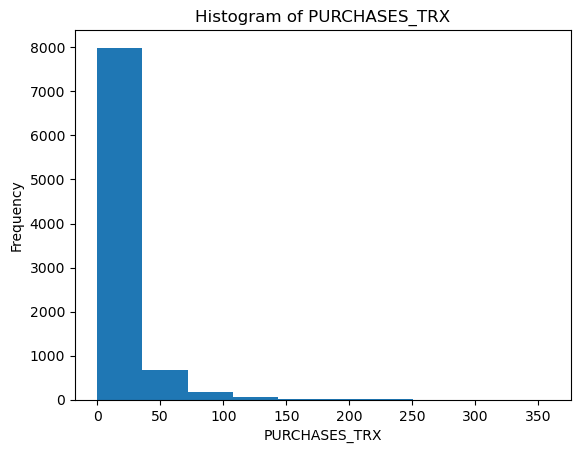

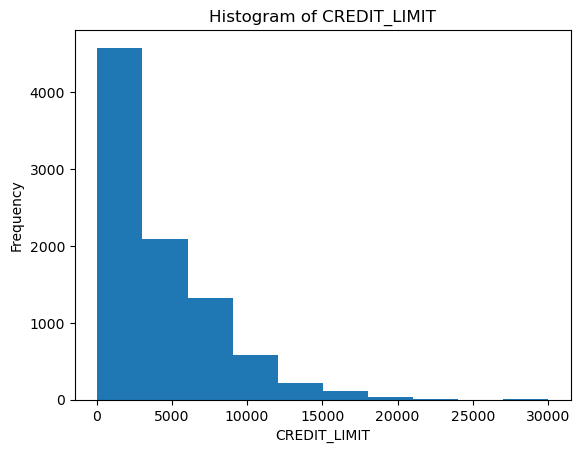

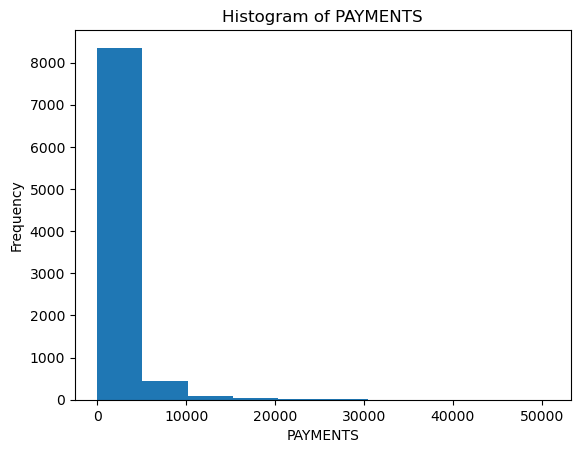

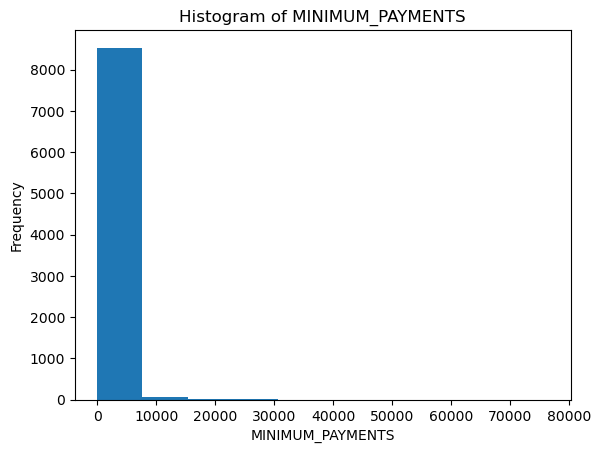

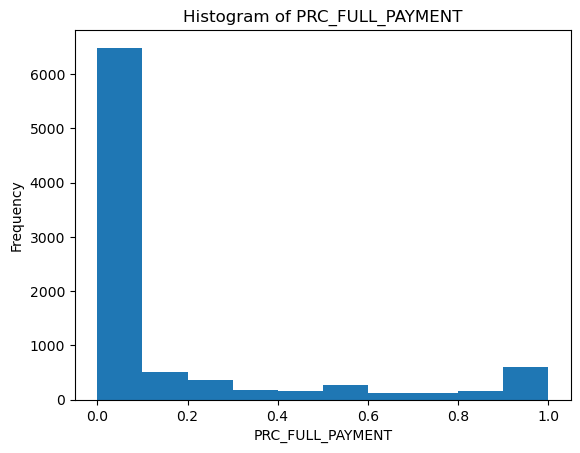

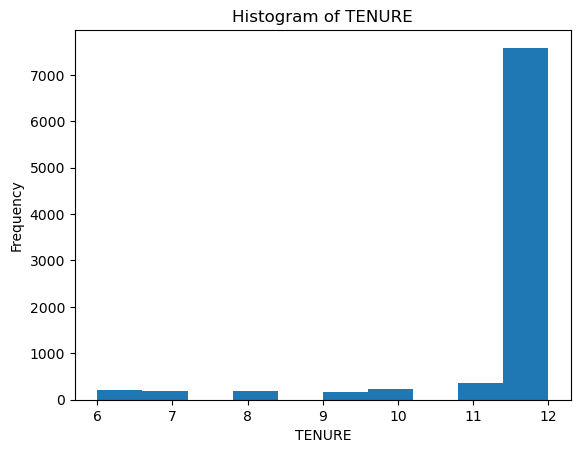

In [11]:
# Iterate over each column in the DataFrame
for column in data.columns:
    # Plot the histogram for the current column
    data[column].plot.hist()
    
    # Set plot title and labels
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.show()

We can conclude that:
- Most columns have a massive number of 0 values. Moreover, most columns are highly right-skewed, as seen from the histograms and the comparison of mean and median values (the mean value is smaller than the median value).

- Some variables have moderate to high correlation values to other variables (>0.5 to 1). Examples of high correlation variables are PURCHASES and ONEOFF_PURCHASES, with a correlation value of 0.92. Another example is CASH_ADVANCE_TRX with CASH_ADVANCE_FREQUENCY, with a correlation value of 0.8.

- When using a credit card, most credit card customers prefer 12 months tenure compared to other tenure options. This suggests that customers are more likely to repay credits in the long term with the consequence of a higher interest rate.

- When investigating the BALANCE column further, it seems that there are many credit cards with 0 balances. This observation is supported by the large number of 0 purchase amounts in the PURCHASE column. Based on these results, it can be assumed that some users intentionally keep the balance low in their account in order to maintain a high credit limit, which affects the credit utilization ratio and credit score.

- Most credit card accounts have a score of 1 in the BALANCE_FREQUENCY column, indicating that most customers use credit cards frequently. However, this differs from the usage of credit cards for one-time transactions (ONEOFF_PURCHASES) and payments in installments (PURCHASES_INSTALLMENT_FREQUENCY), where the majority of customers do not use credit cards for these types of transactions.

# EDA (Exploratory Data Analysis)

/var/folders/t3/86m1_zcd3tz_2_rp7vpph3g40000gn/T/ipykernel_96012/559791289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda1['TENURE'] = eda1['TENURE'].astype(str)


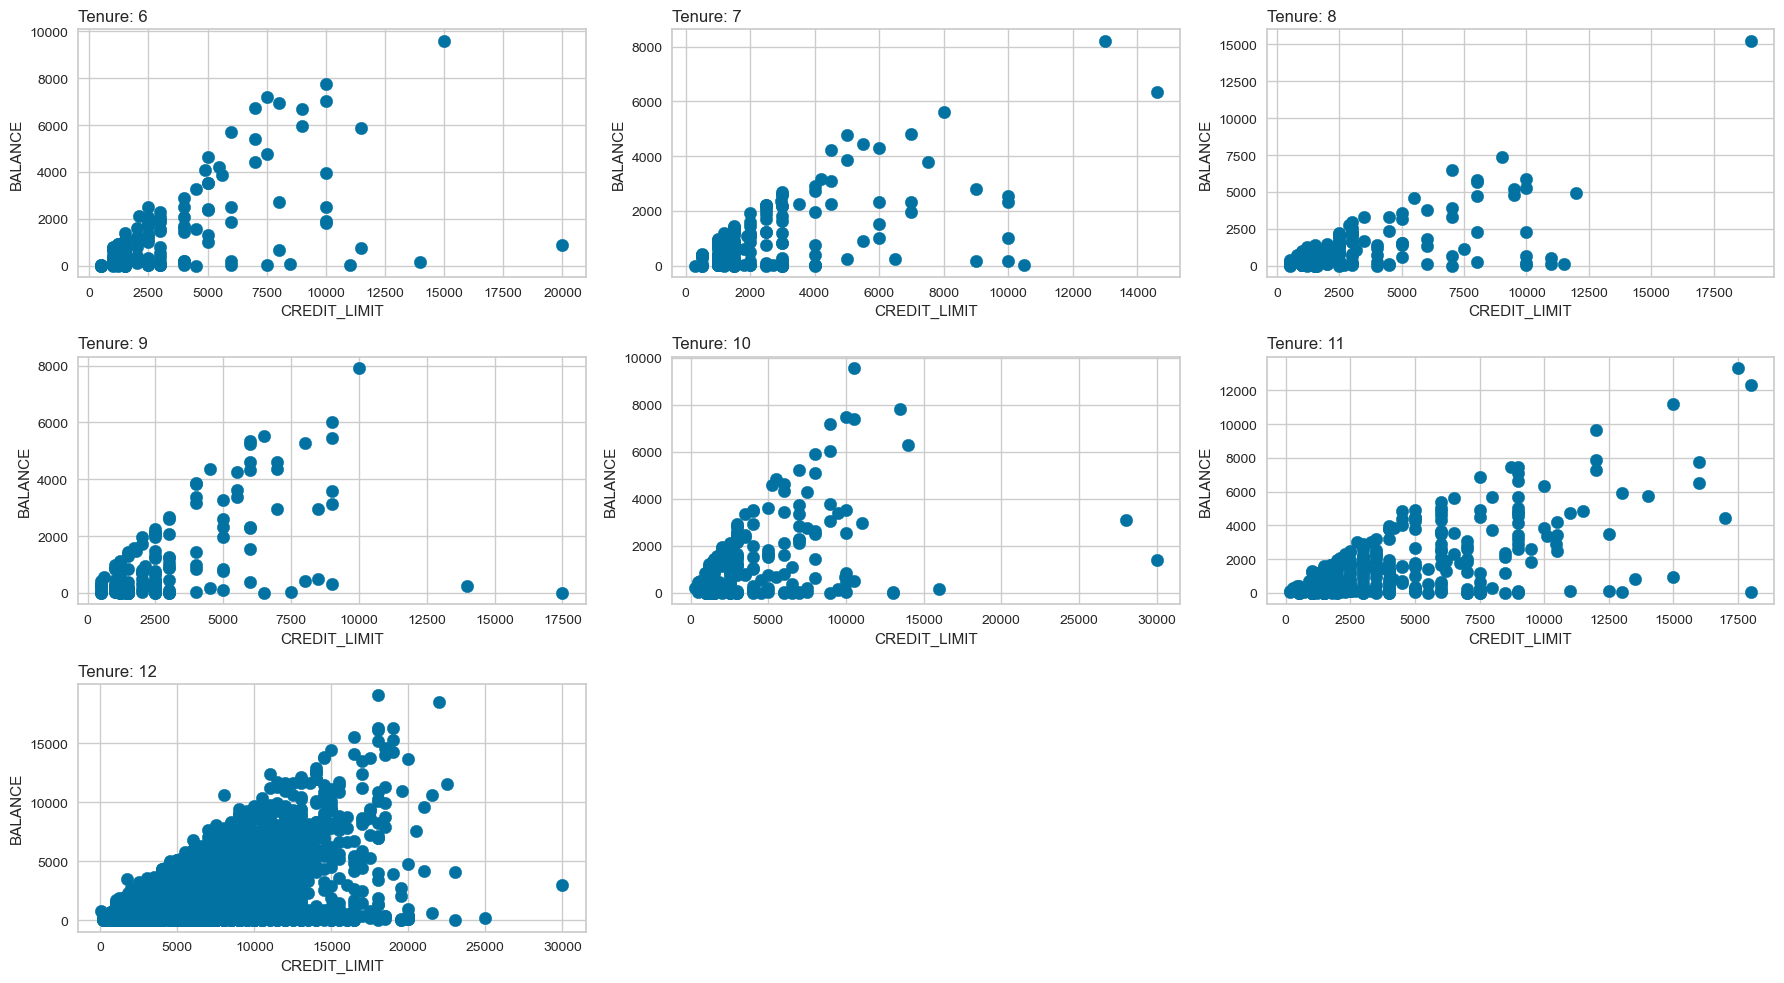

In [16]:
eda1 = data[['CREDIT_LIMIT', 'BALANCE', 'TENURE']]
eda1['TENURE'] = eda1['TENURE'].astype(str)
tenure = sorted(eda1['TENURE'].unique(),key = int)

fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.flatten()

for i, t in enumerate(tenure):
    ax = axes[i]
    eda1_x = eda1[eda1['TENURE'] == t]
    ax.scatter(eda1_x['CREDIT_LIMIT'], eda1_x['BALANCE'], s=80)
    ax.set_title(f'Tenure: {t}', loc='left')
    ax.set_xlabel('CREDIT_LIMIT')
    ax.set_ylabel('BALANCE')
    
num_tenure = len(tenure)
num_cols = 3
num_rows = (num_tenure - 1) // num_cols + 1
# Hide extra subplots if there are fewer unique tenure categories than subplots
for j in range(num_tenure, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The scatter plot reveals a noticeable pattern where the distribution of residual variance increases with the increase in variable values, eventually forming a cone shape, indicating the presence of heteroscedasticity. Additionally, consistent with previous findings, the majority of credit card customers show a preference for a 12-month tenure

# Data preprocesing

### Fill mising data using KNN

In [17]:
from sklearn.impute import KNNImputer

null_columns = data.columns[data.isnull().any()].tolist()

imputer = KNNImputer()
df_imp = pd.DataFrame(imputer.fit_transform(data[null_columns]), columns=null_columns)
data = data.fillna(df_imp)

### Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### Hopkins test for containing meaningful clustrs

### PCA

In [19]:
from sklearn.decomposition import PCA

In [20]:
# --- Transform into Array ---
X = np.asarray(scaled_data)

# --- Applying PCA ---
pca = PCA(n_components=2, random_state=24)
X = pca.fit_transform(X)

# Models

## Kmean

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [14]:
print(X.split())

NameError: name 'X' is not defined

Elbow Method to determine the number of clusters to be formed:


/Users/romafurman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/romafurman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/romafurman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/romafurman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

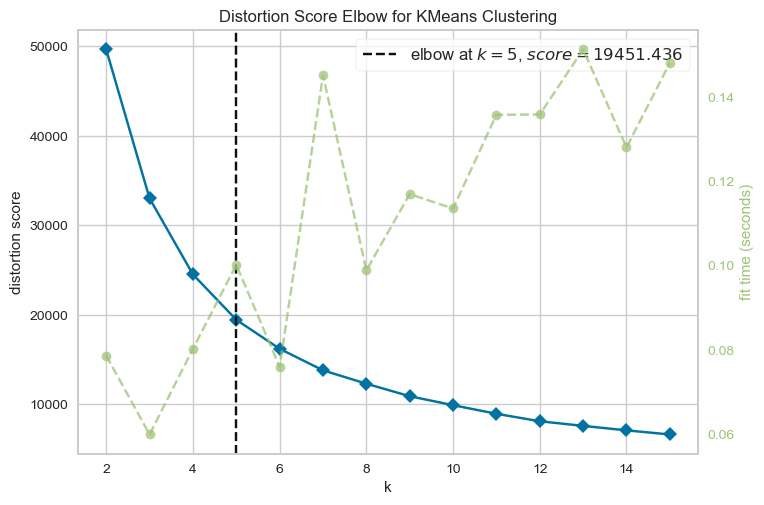

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=32, max_iter=500), k=(2, 16))
Elbow_M.fit(X)
Elbow_M.show()

/Users/romafurman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/romafurman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/romafurman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/romafurman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

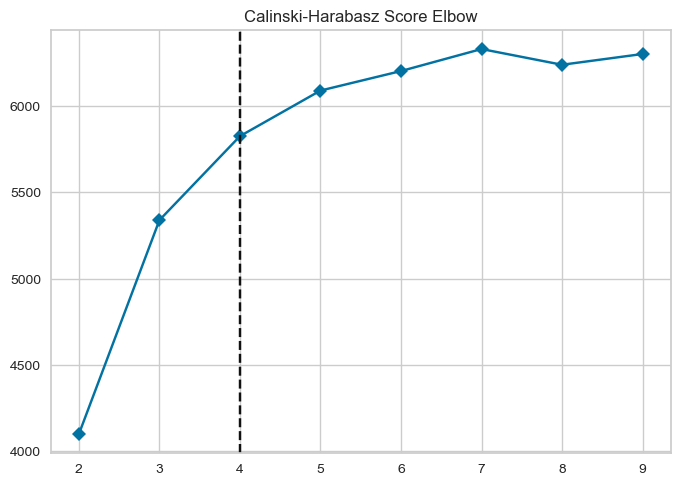

In [28]:
elbow_score_ch = KElbowVisualizer(KMeans(random_state=32, max_iter=500), k=(2, 10), metric='calinski_harabasz', timings=False)
elbow_score_ch.fit(X)
elbow_score_ch.set_title("Calinski-Harabasz Score Elbow")

In [52]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

/Users/romafurman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/romafurman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/romafurman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/romafurman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

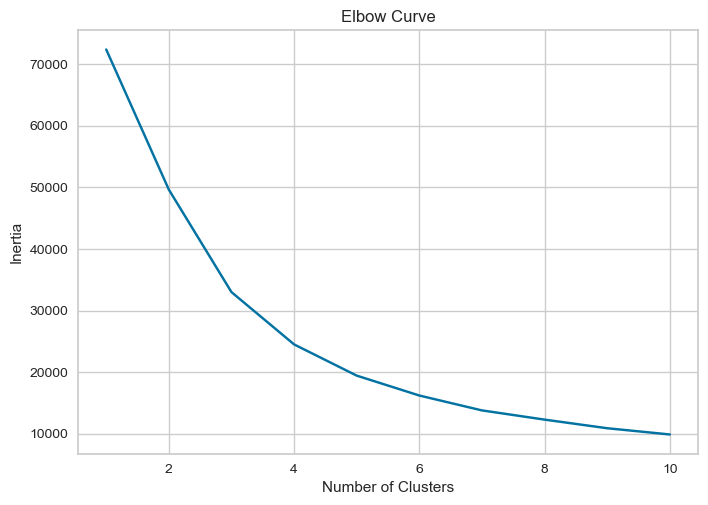

In [53]:
# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

### K = 4

In [36]:
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500)
y_kmeans = kmeans.fit_predict(X)

/Users/romafurman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
y_kmeans_labels = list(set(y_kmeans.tolist()))

Text(0.5, 1.0, 'Scatter Plot Clusters Distributions')

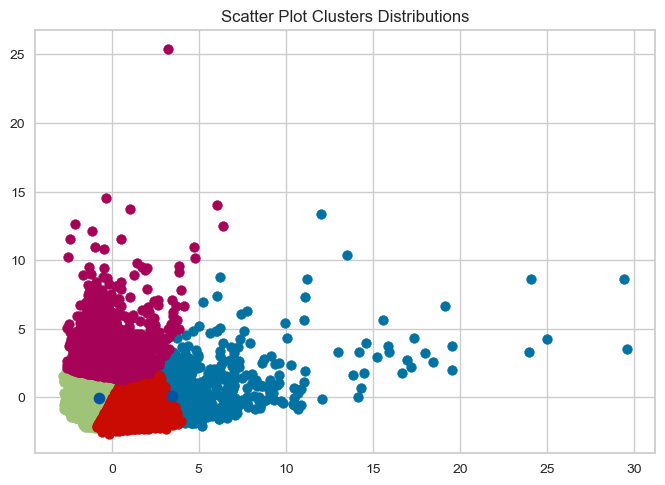

In [48]:
# --- Clusters Distribution ---
y_kmeans_labels = list(set(y_kmeans.tolist()))
for i in y_kmeans_labels:
    plt.scatter(X[y_kmeans==i, 0], X[y_kmeans == i, 1], s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=65, c='#0353A4', label='Centroids')
plt.title('Scatter Plot Clusters Distributions')

In [50]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

In [51]:
print("Davies-Bouldin Index:", round(davies_bouldin_score(X, y_kmeans), 3))
print("Silhouette Score:", round(silhouette_score(X, y_kmeans), 3))
print("Calinski Harabasz Index:", round(calinski_harabasz_score(X, y_kmeans), 3))

Davies-Bouldin Index: 0.801
Silhouette Score: 0.408
Calinski Harabasz Index: 5823.676


## Agglomerative Clustering

In [54]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [57]:
# Apply hierarchical clustering
linkage_matrix = linkage(X, method='ward', metric='euclidean')

In [59]:
linkage_matrix

array([[4.97800000e+03, 6.64400000e+03, 1.05924237e-04, 2.00000000e+00],
       [1.16800000e+03, 6.90700000e+03, 1.82451415e-04, 2.00000000e+00],
       [4.64000000e+02, 8.14300000e+03, 2.50661577e-04, 2.00000000e+00],
       ...,
       [1.78900000e+04, 1.78930000e+04, 1.48110129e+02, 5.53400000e+03],
       [1.78940000e+04, 1.78950000e+04, 1.53480199e+02, 3.41600000e+03],
       [1.78960000e+04, 1.78970000e+04, 2.09296462e+02, 8.95000000e+03]])

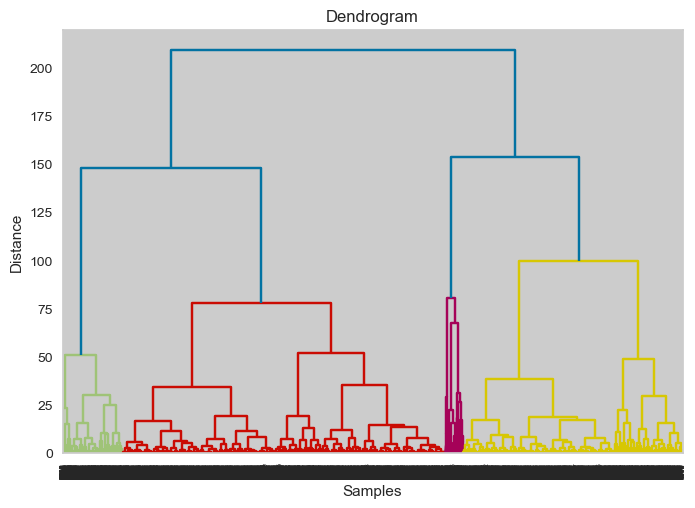

In [60]:
# Plot the dendrogram
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


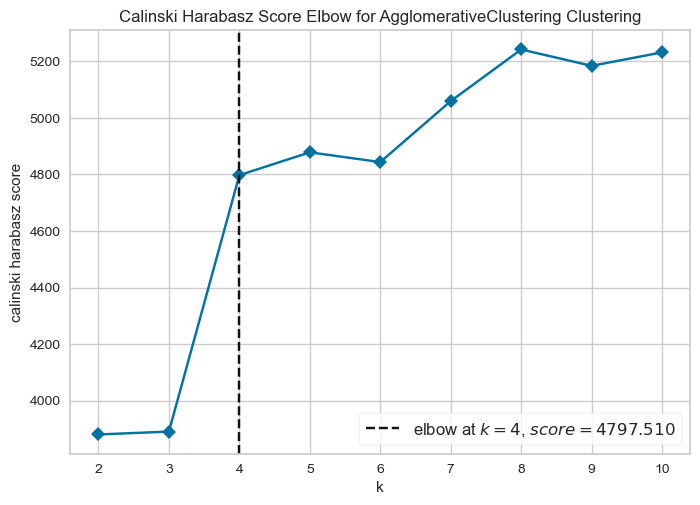

In [63]:
elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False)
elbow_score_ch.fit(X)
elbow_score_ch.finalize()
plt.show()

In [64]:
agg_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg_cluster = agg_cluster.fit_predict(X)

/Users/romafurman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


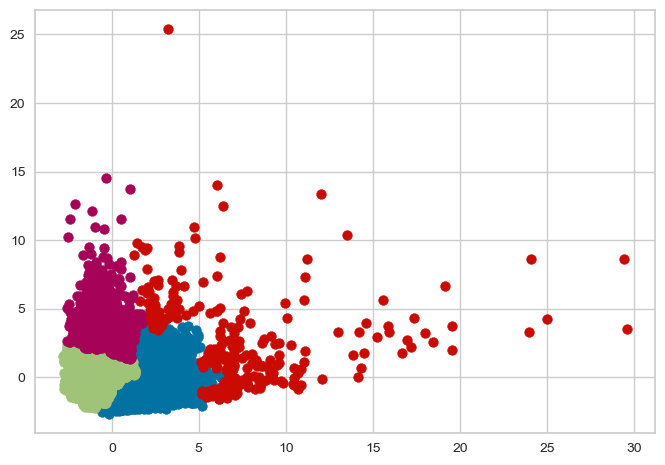

In [65]:
# --- Clusters Distribution ---
y_agg_labels = list(set(y_agg_cluster.tolist()))
for i in y_agg_labels:
    plt.scatter(X[y_agg_cluster==i, 0], X[y_agg_cluster == i, 1], s=50)
plt.show()

In [66]:
print("Davies-Bouldin Index:", round(davies_bouldin_score(X, y_agg_cluster), 3))
print("Silhouette Score:", round(silhouette_score(X, y_agg_cluster), 3))
print("Calinski Harabasz Index:", round(calinski_harabasz_score(X, y_agg_cluster), 3))

Davies-Bouldin Index: 0.863
Silhouette Score: 0.388
Calinski Harabasz Index: 4797.51


## DBScan

In [68]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [69]:
# --- Calculate Nearest Neighbors ---
neighbors=NearestNeighbors(n_neighbors=2)
nbrs=neighbors.fit(X)
distances, indices=nbrs.kneighbors(X)
distances=np.sort(distances, axis = 0)

Text(0.5, 1.0, 'DBSCAN Epsilon Value')

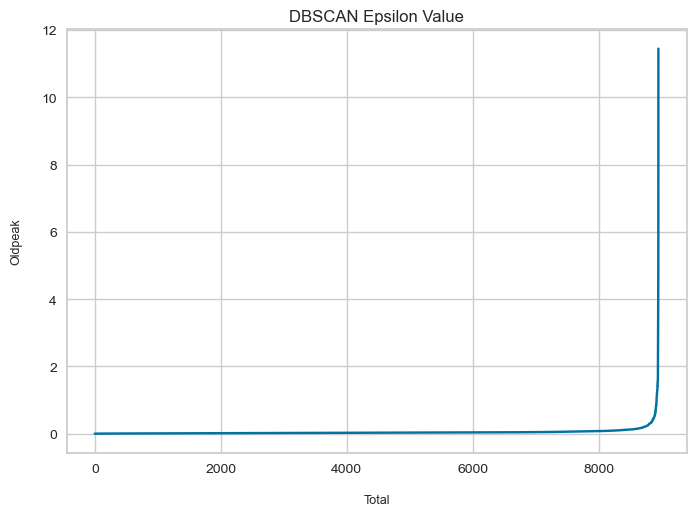

In [70]:
distances_1=distances[:, 1]
plt.plot(distances_1)
plt.xlabel('\nTotal', fontsize=9)
plt.ylabel('Oldpeak\n', fontsize=9)
plt.title("DBSCAN Epsilon Value")

In [83]:
dbscan = DBSCAN(eps=2, min_samples=4)
y_dbscan = dbscan.fit_predict(X)

# Get the cluster labels (-1 represents outliers)
dbscan_labels = dbscan.labels_

In [84]:
y_dbscan_labels = list(set(y_dbscan.tolist()))

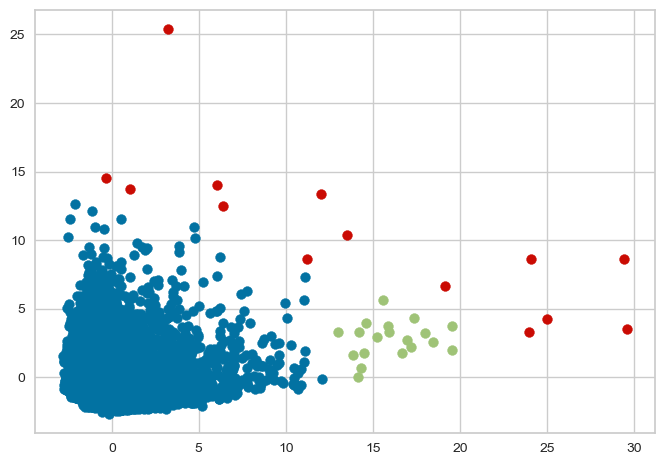

In [85]:
# --- Clusters Distribution ---
y_agg_labels = list(set(y_dbscan.tolist()))
for i in y_agg_labels:
    plt.scatter(X[y_dbscan==i, 0], X[y_dbscan == i, 1], s=50)
plt.show()

In [86]:
print("Davies-Bouldin Index:", round(davies_bouldin_score(X, y_dbscan), 3))
print("Silhouette Score:", round(silhouette_score(X, y_dbscan), 3))
print("Calinski Harabasz Index:", round(calinski_harabasz_score(X, y_dbscan), 3))

Davies-Bouldin Index: 1.287
Silhouette Score: 0.803
Calinski Harabasz Index: 685.303


# Conclusion

In [93]:
# --- Add K-Means Prediction to Data Frame ----
data['cluster_result'] = y_kmeans+1
data['cluster_result'] = 'Cluster '+data['cluster_result'].astype(str)

# --- Calculationg Overall Mean from Current Data Frame ---
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = data.describe().loc[['mean']].T

# --- Summarize Mean of Each Clusters --- 
df_cluster_summary = data.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# --- Combining Both Data Frame ---
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()

In [94]:
df_profile

,Column Name,Metrics,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Overall
0,BALANCE,mean,3401.840056,1012.915503,824.180354,4510.612798,1564.474828
1,BALANCE_FREQUENCY,mean,0.988427,0.799792,0.919997,0.963486,0.877271
2,PURCHASES,mean,6894.613917,223.081279,1236.499406,462.647357,1003.204834
3,ONEOFF_PURCHASES,mean,4511.889901,157.576608,621.738764,300.127390,592.437371
4,INSTALLMENTS_PURCHASES,mean,2383.916859,65.833785,614.965725,162.619301,411.067645
5,CASH_ADVANCE,mean,773.154467,614.588758,147.442197,4401.478579,978.871112
6,PURCHASES_FREQUENCY,mean,0.954443,0.190099,0.862440,0.266258,0.490351
7,ONEOFF_PURCHASES_FREQUENCY,mean,0.726667,0.074901,0.301883,0.129829,0.202458
8,PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.808946,0.109962,0.675116,0.166187,0.364437
9,CASH_ADVANCE_FREQUENCY,mean,0.084806,0.122459,0.030698,0.470904,0.135144


Based on the table above, it can be concluded that each cluster has the following characteristics:
1. Cluster 1 (Full Payers Users): Customers in this cluster are active users of the bank's credit card.
2. Cluster 2 (Starter/Student users): In contrast to cluster 1, customers rarely/almost never use credit cards for transactions and installments in this cluster.
3. Cluster 3 (Installment Users): In this cluster, customers use credit cards specifically for installment purposes. This is due to the relatively high level of transactions using installments in this cluster.
4. Cluster 4 (Cash Advance/Withdraw Users): Customers in this cluster have high balances, the balances frequency are always changing, and the frequency of cash in advance and cash in advance is high. In addition, customers in this cluster have the lowest interest rates compared to other clusters and have the second highest credit limit and payments out of the four clusters.